In [ ]:
import numpy as np
import pandas as pd 


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Loading

In [ ]:
path = 'energydata_complete.csv'
dataLoad = pd.read_csv(path, index_col='date')


## Basic Data Exploration

In [ ]:
dataLoad.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
11-01-2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
11-01-2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
11-01-2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
11-01-2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
11-01-2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
dataLoad.shape

(19735, 28)

In [ ]:
dataLoad.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19735 entries, 11-01-2016 17:00 to 27-05-2016 18:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9           19735 non-nu

In [ ]:
dataLoad.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [ ]:
dataLoad.isnull().sum()

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

## Exploratory Data Analysis

### Univariate

In [ ]:
dataVisual = dataLoad.drop(['rv1', 'rv2'], axis=1)

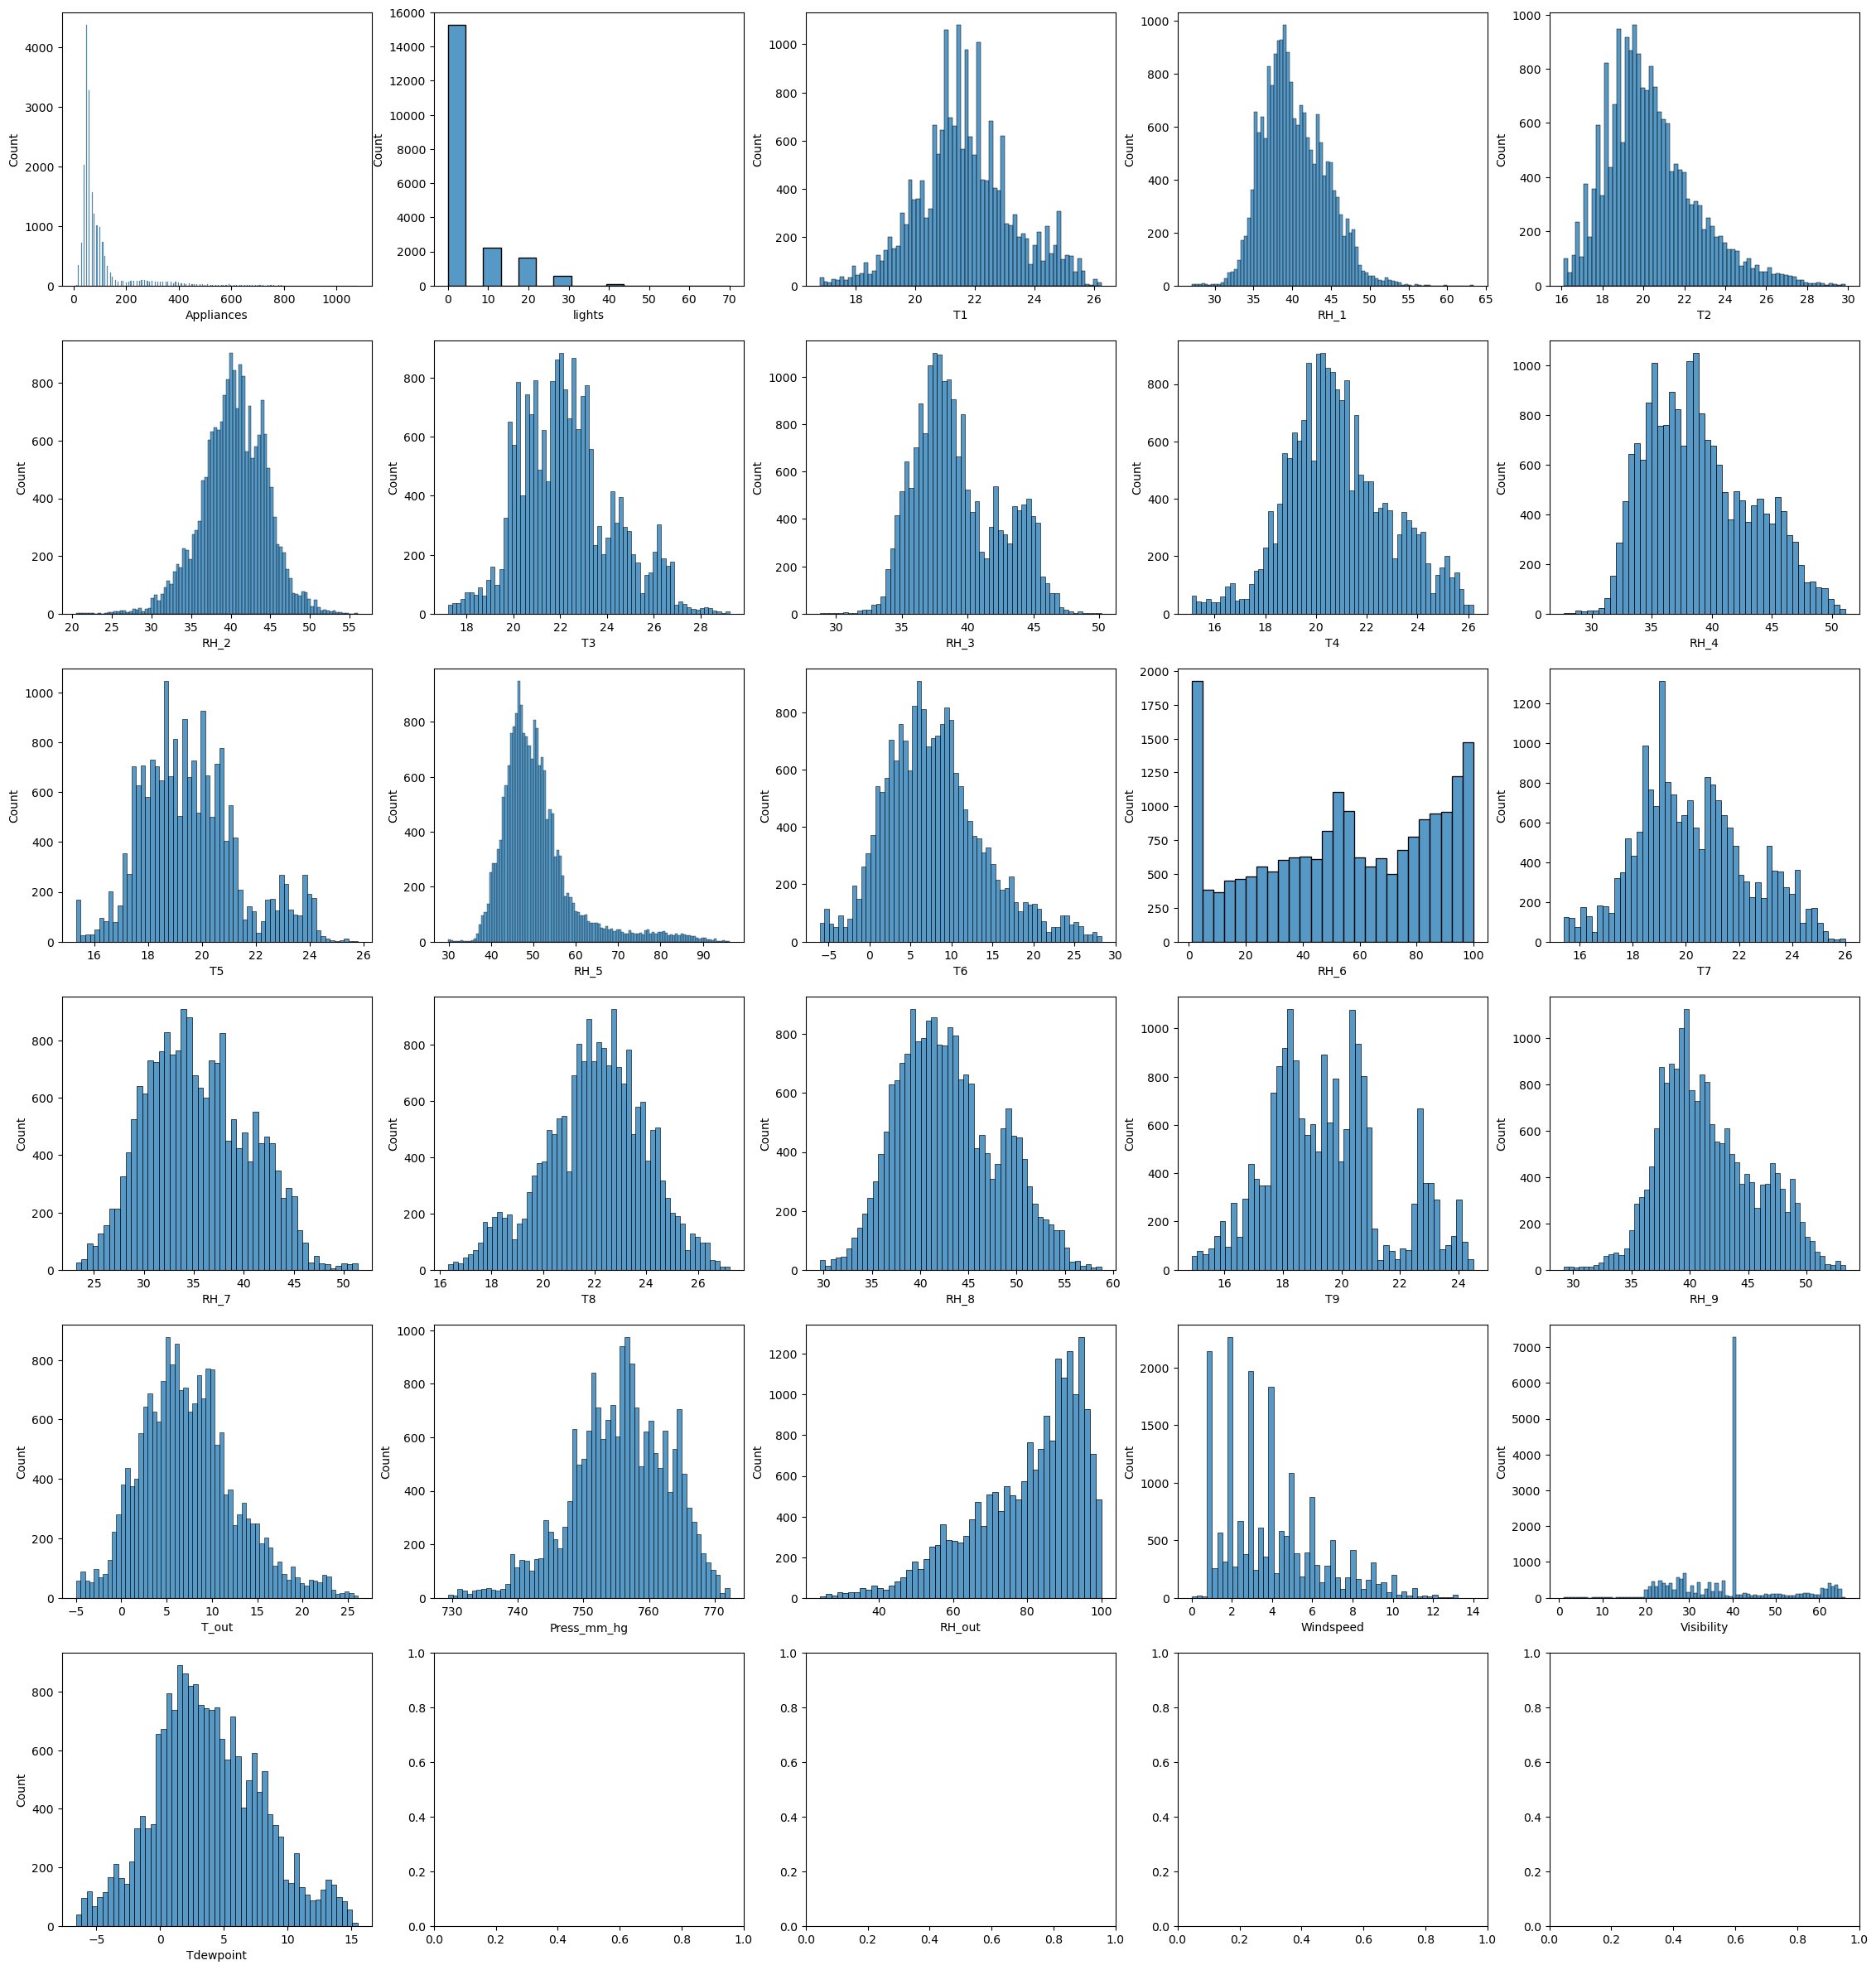

In [ ]:
# Distribution plot for each features

ls = []
colName = [j for j in dataVisual.columns]
a = 0
while a < 7:
    for i in range(5):
        ls.append((a, i))
    a+=1
fig, ax = plt.subplots(6, 5, figsize=(28, 30))
for k in range(26):
    sns.histplot(ax=ax[ls[k][0], ls[k][1]], x=colName[k], data=dataVisual)
    
        

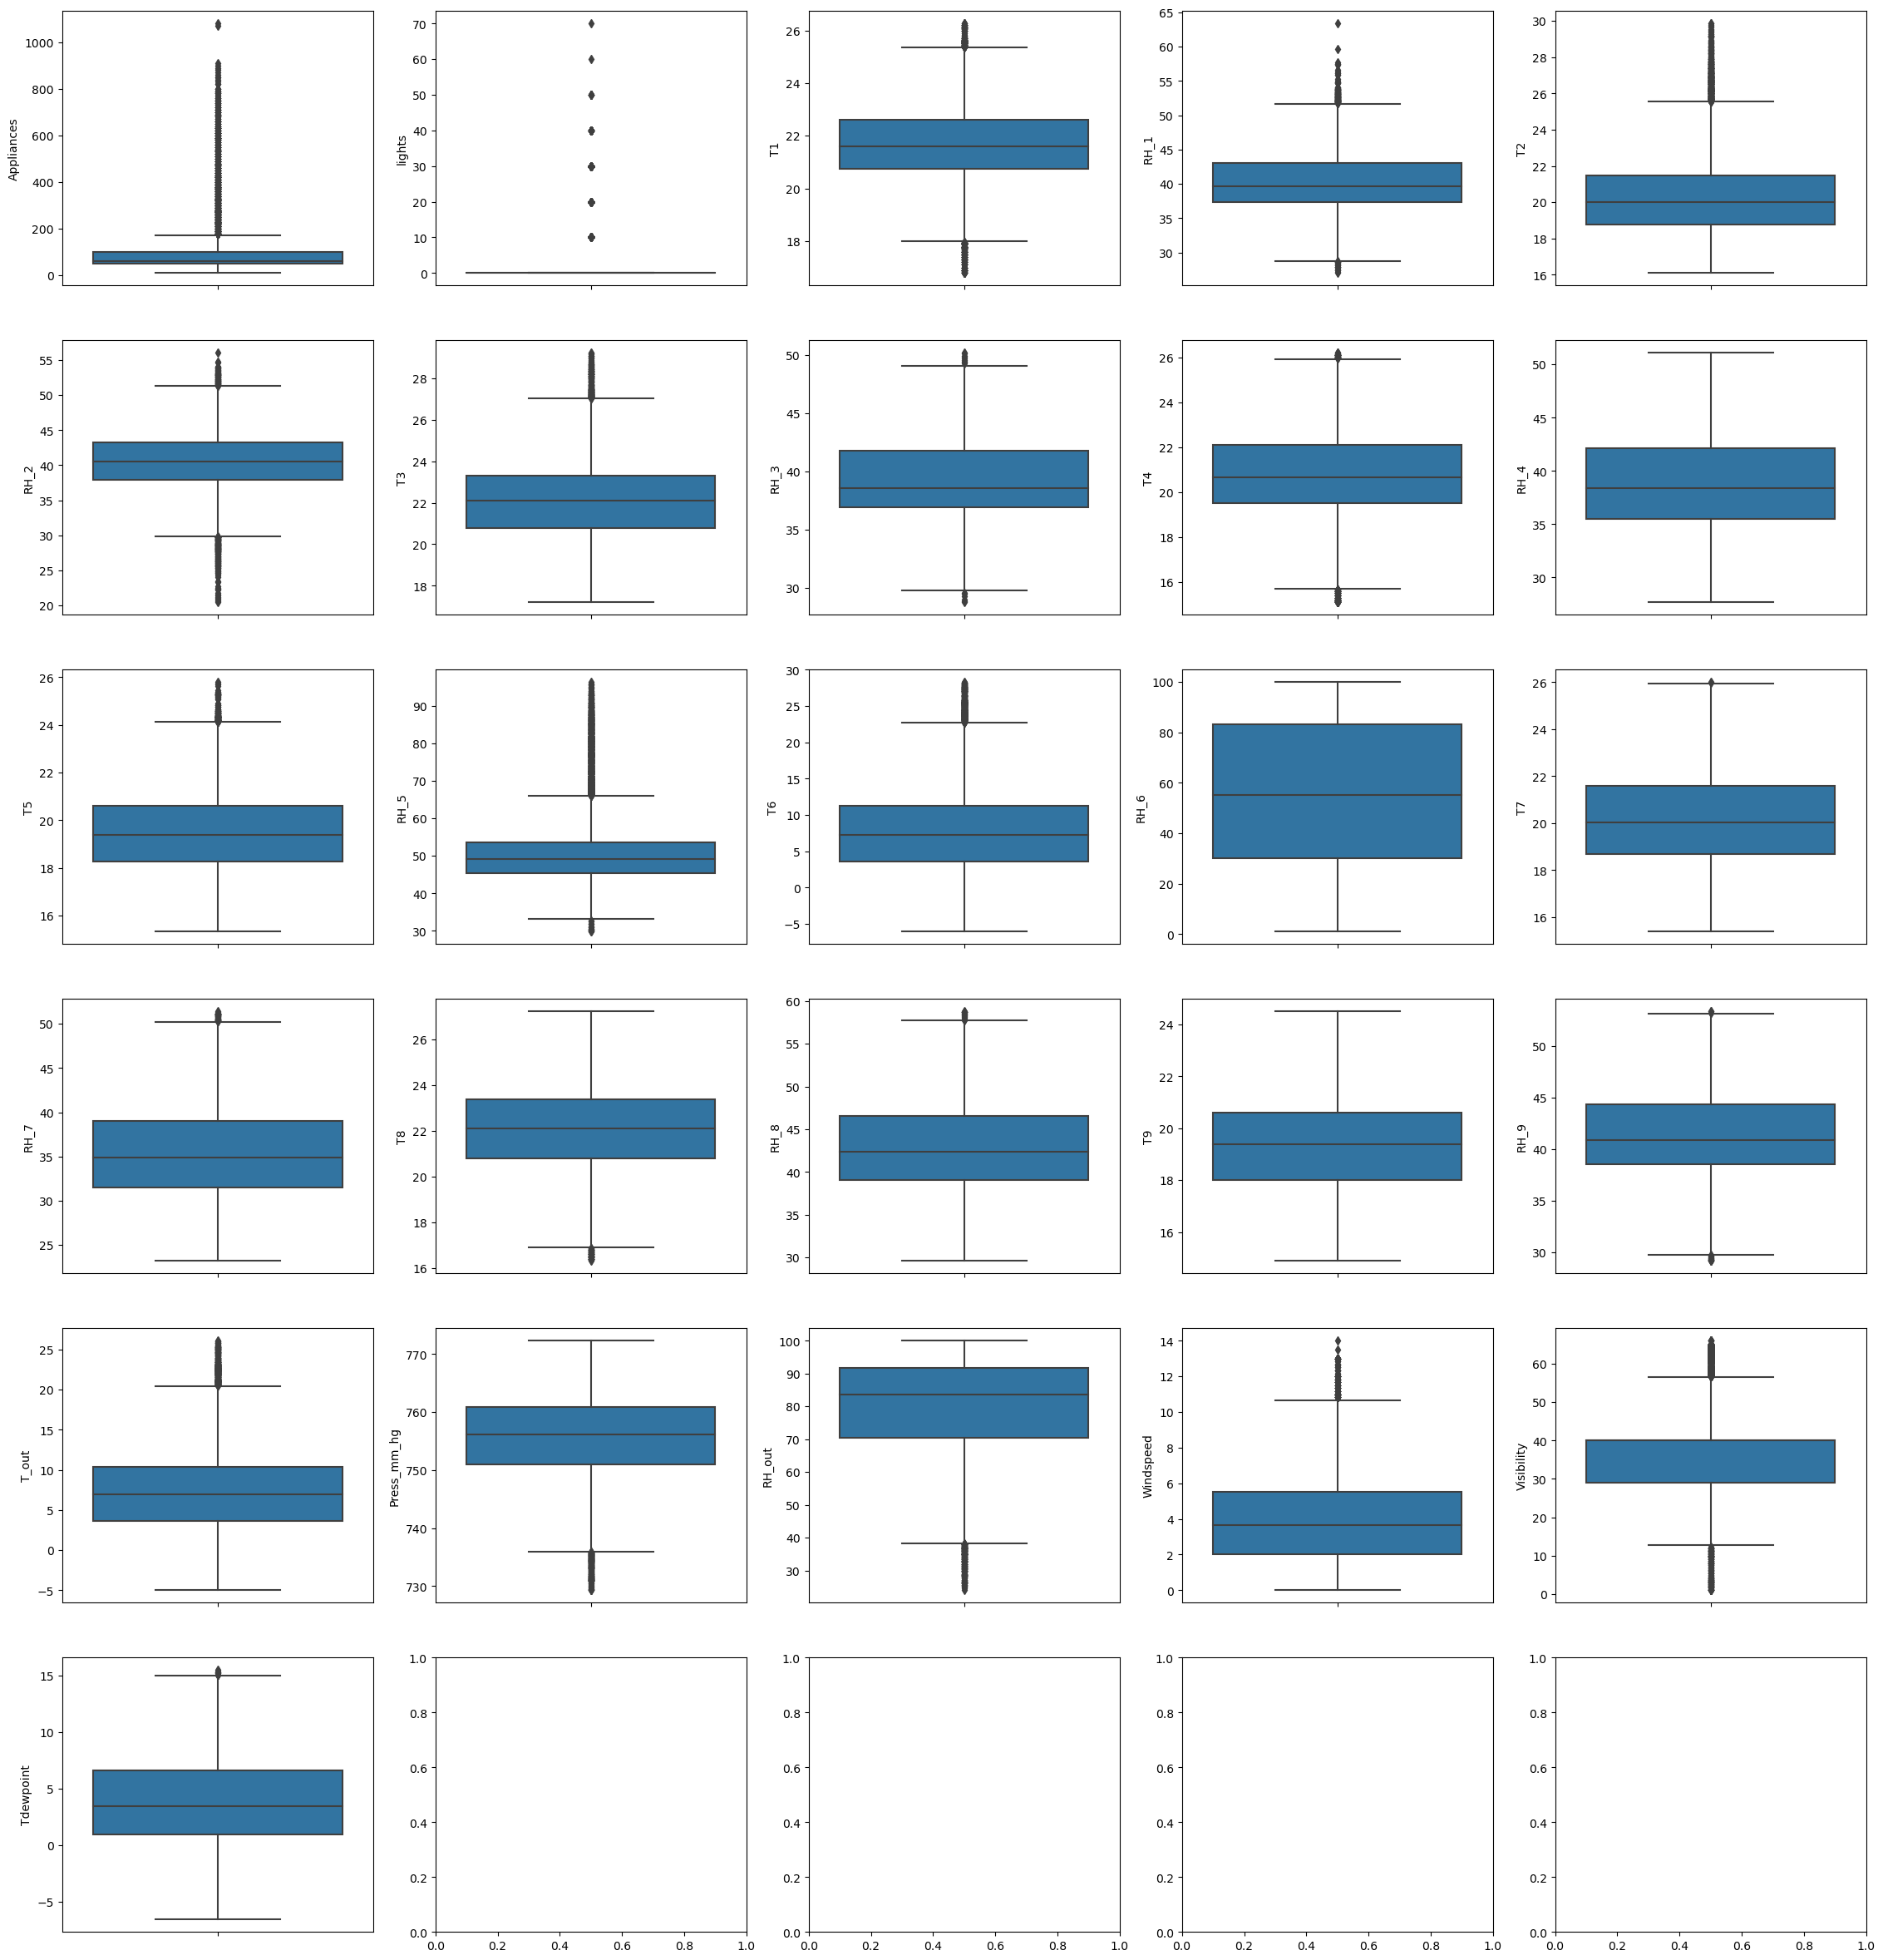

In [ ]:
a = 0
while a < 7:
    for i in range(5):
        ls.append((a, i))
    a+=1
fig, ax = plt.subplots(6, 5, figsize=(28, 30))
for k in range(26):
    sns.boxplot(ax=ax[ls[k][0], ls[k][1]], y=colName[k], data=dataVisual)

## Bivariate

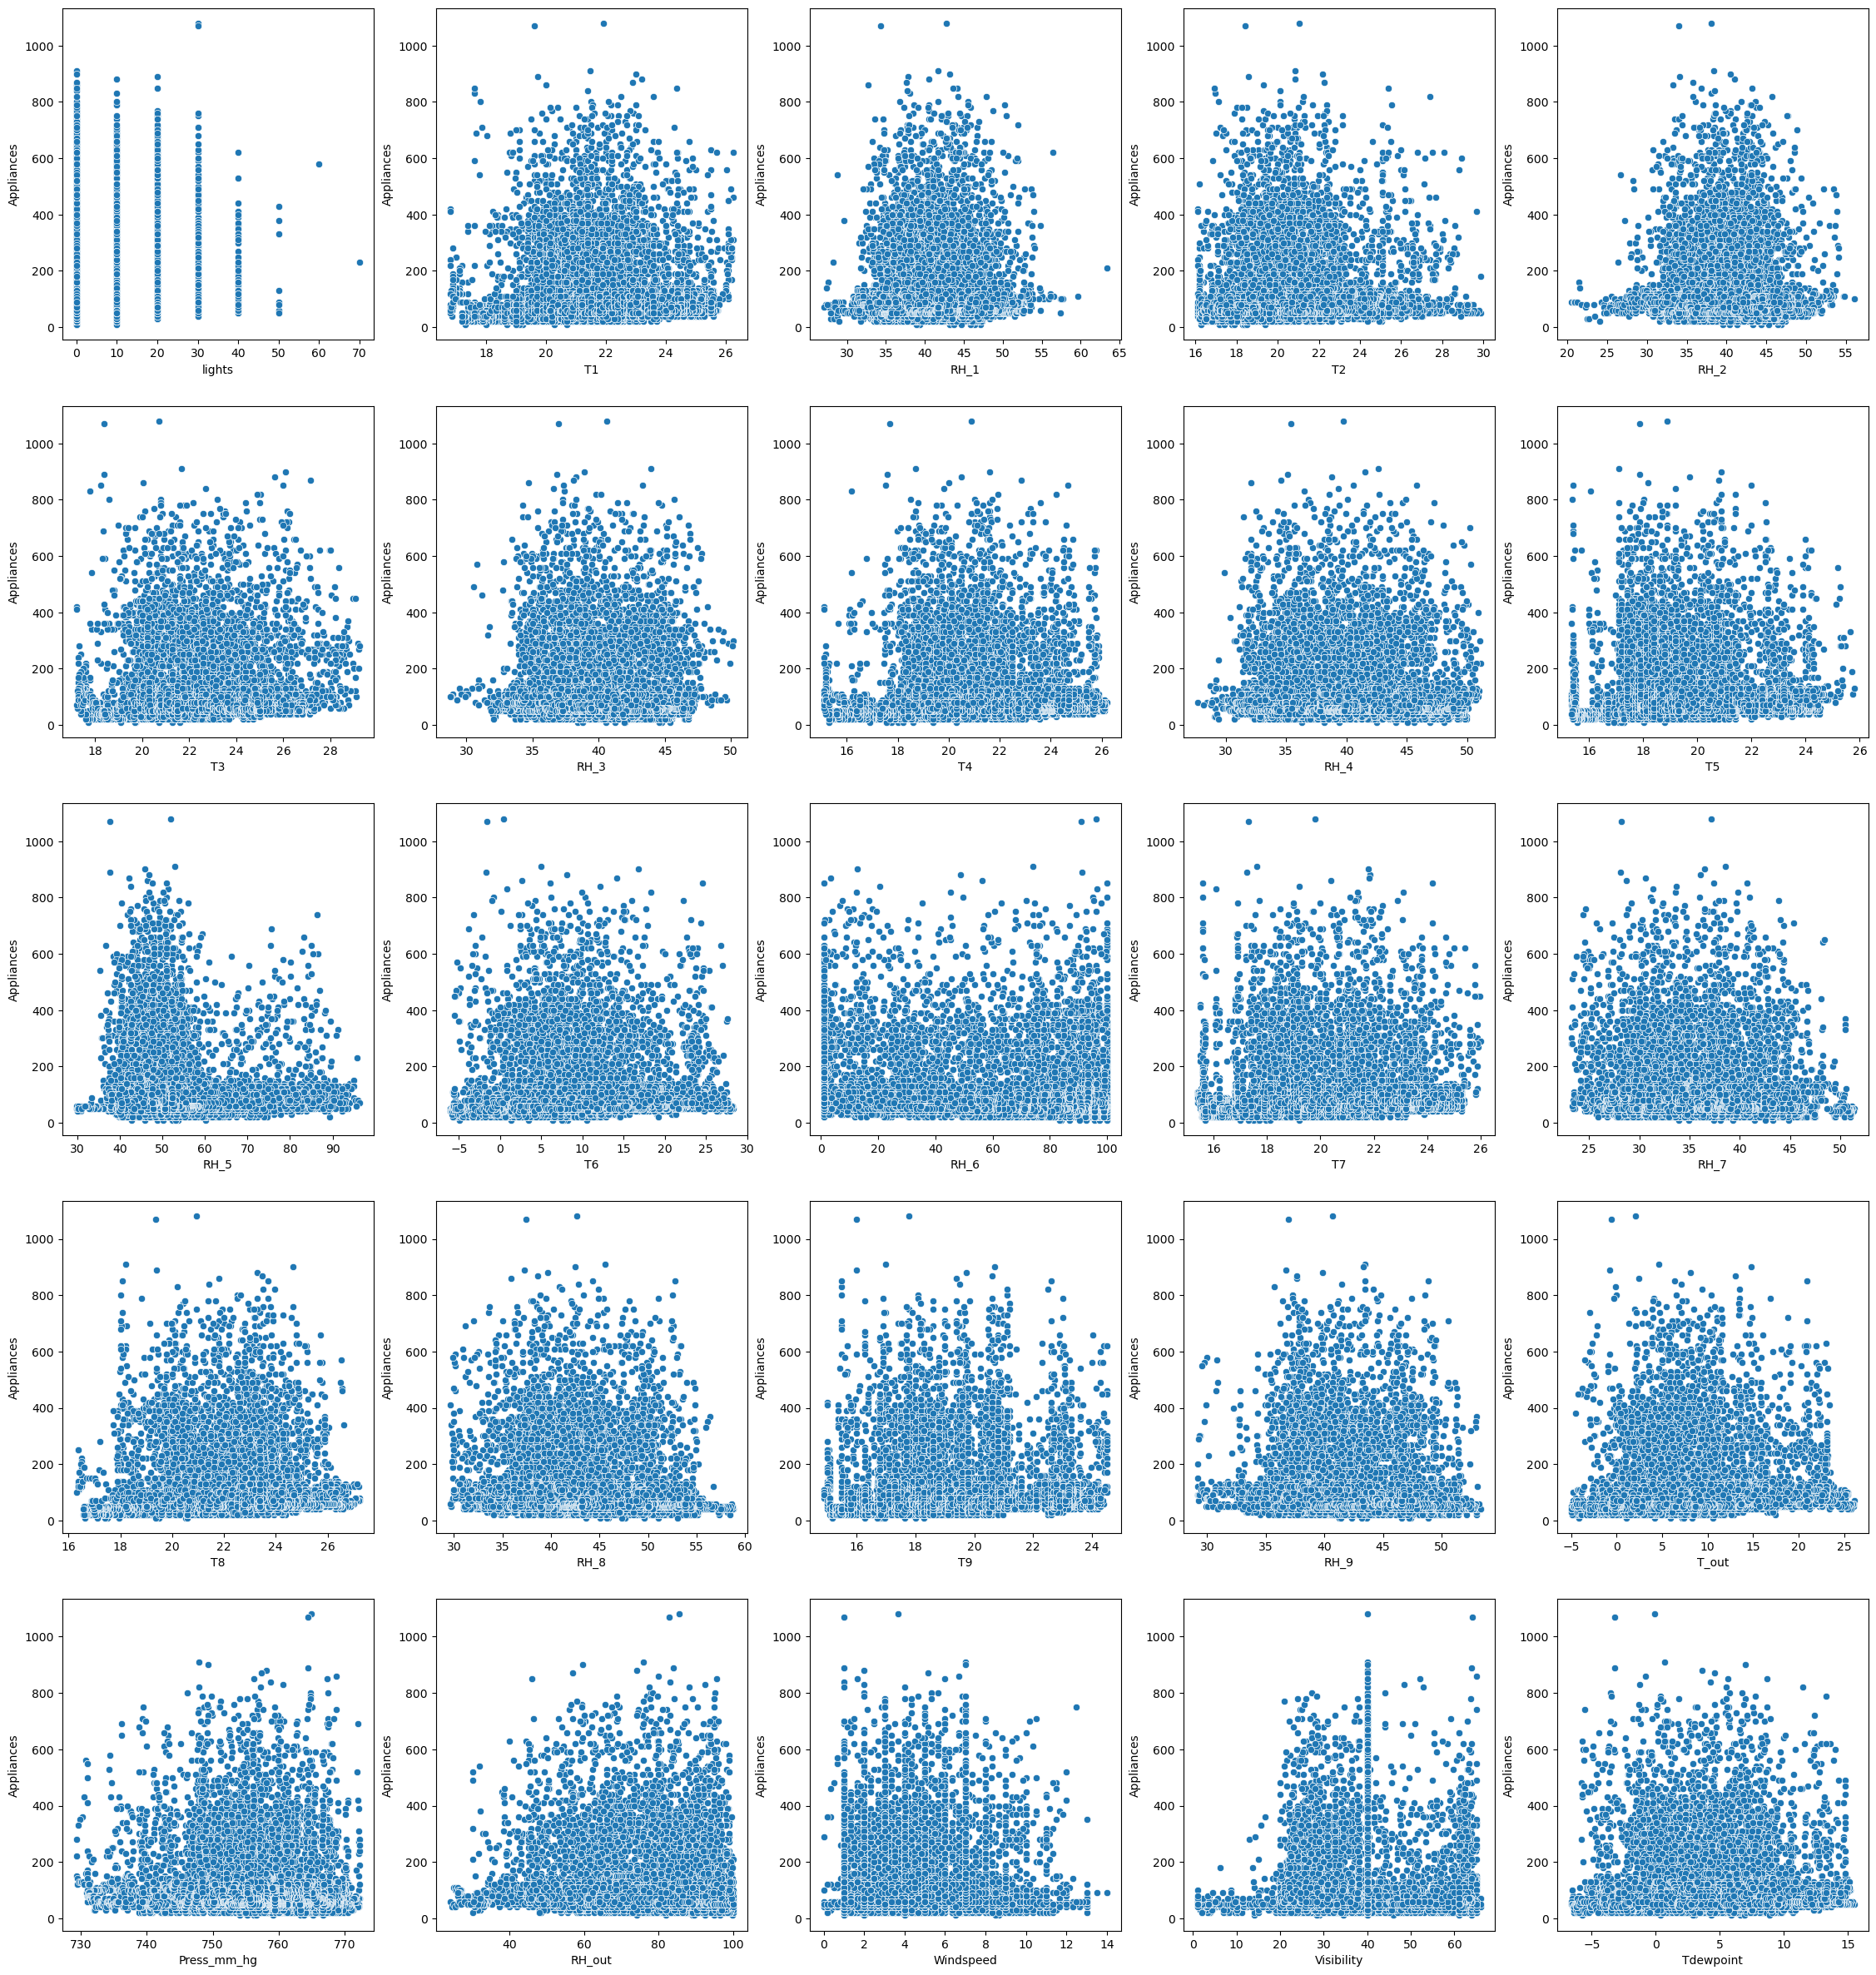

In [ ]:
b = 0
while b < 7:
    for i in range(5):
        ls.append((b, i))
    b+=1
fig, ax = plt.subplots(5, 5, figsize=(28, 30))
for k in range(25):
    sns.scatterplot(ax=ax[ls[k][0], ls[k][1]], x=colName[k+1], y=colName[0], data=dataVisual)

<Axes: >

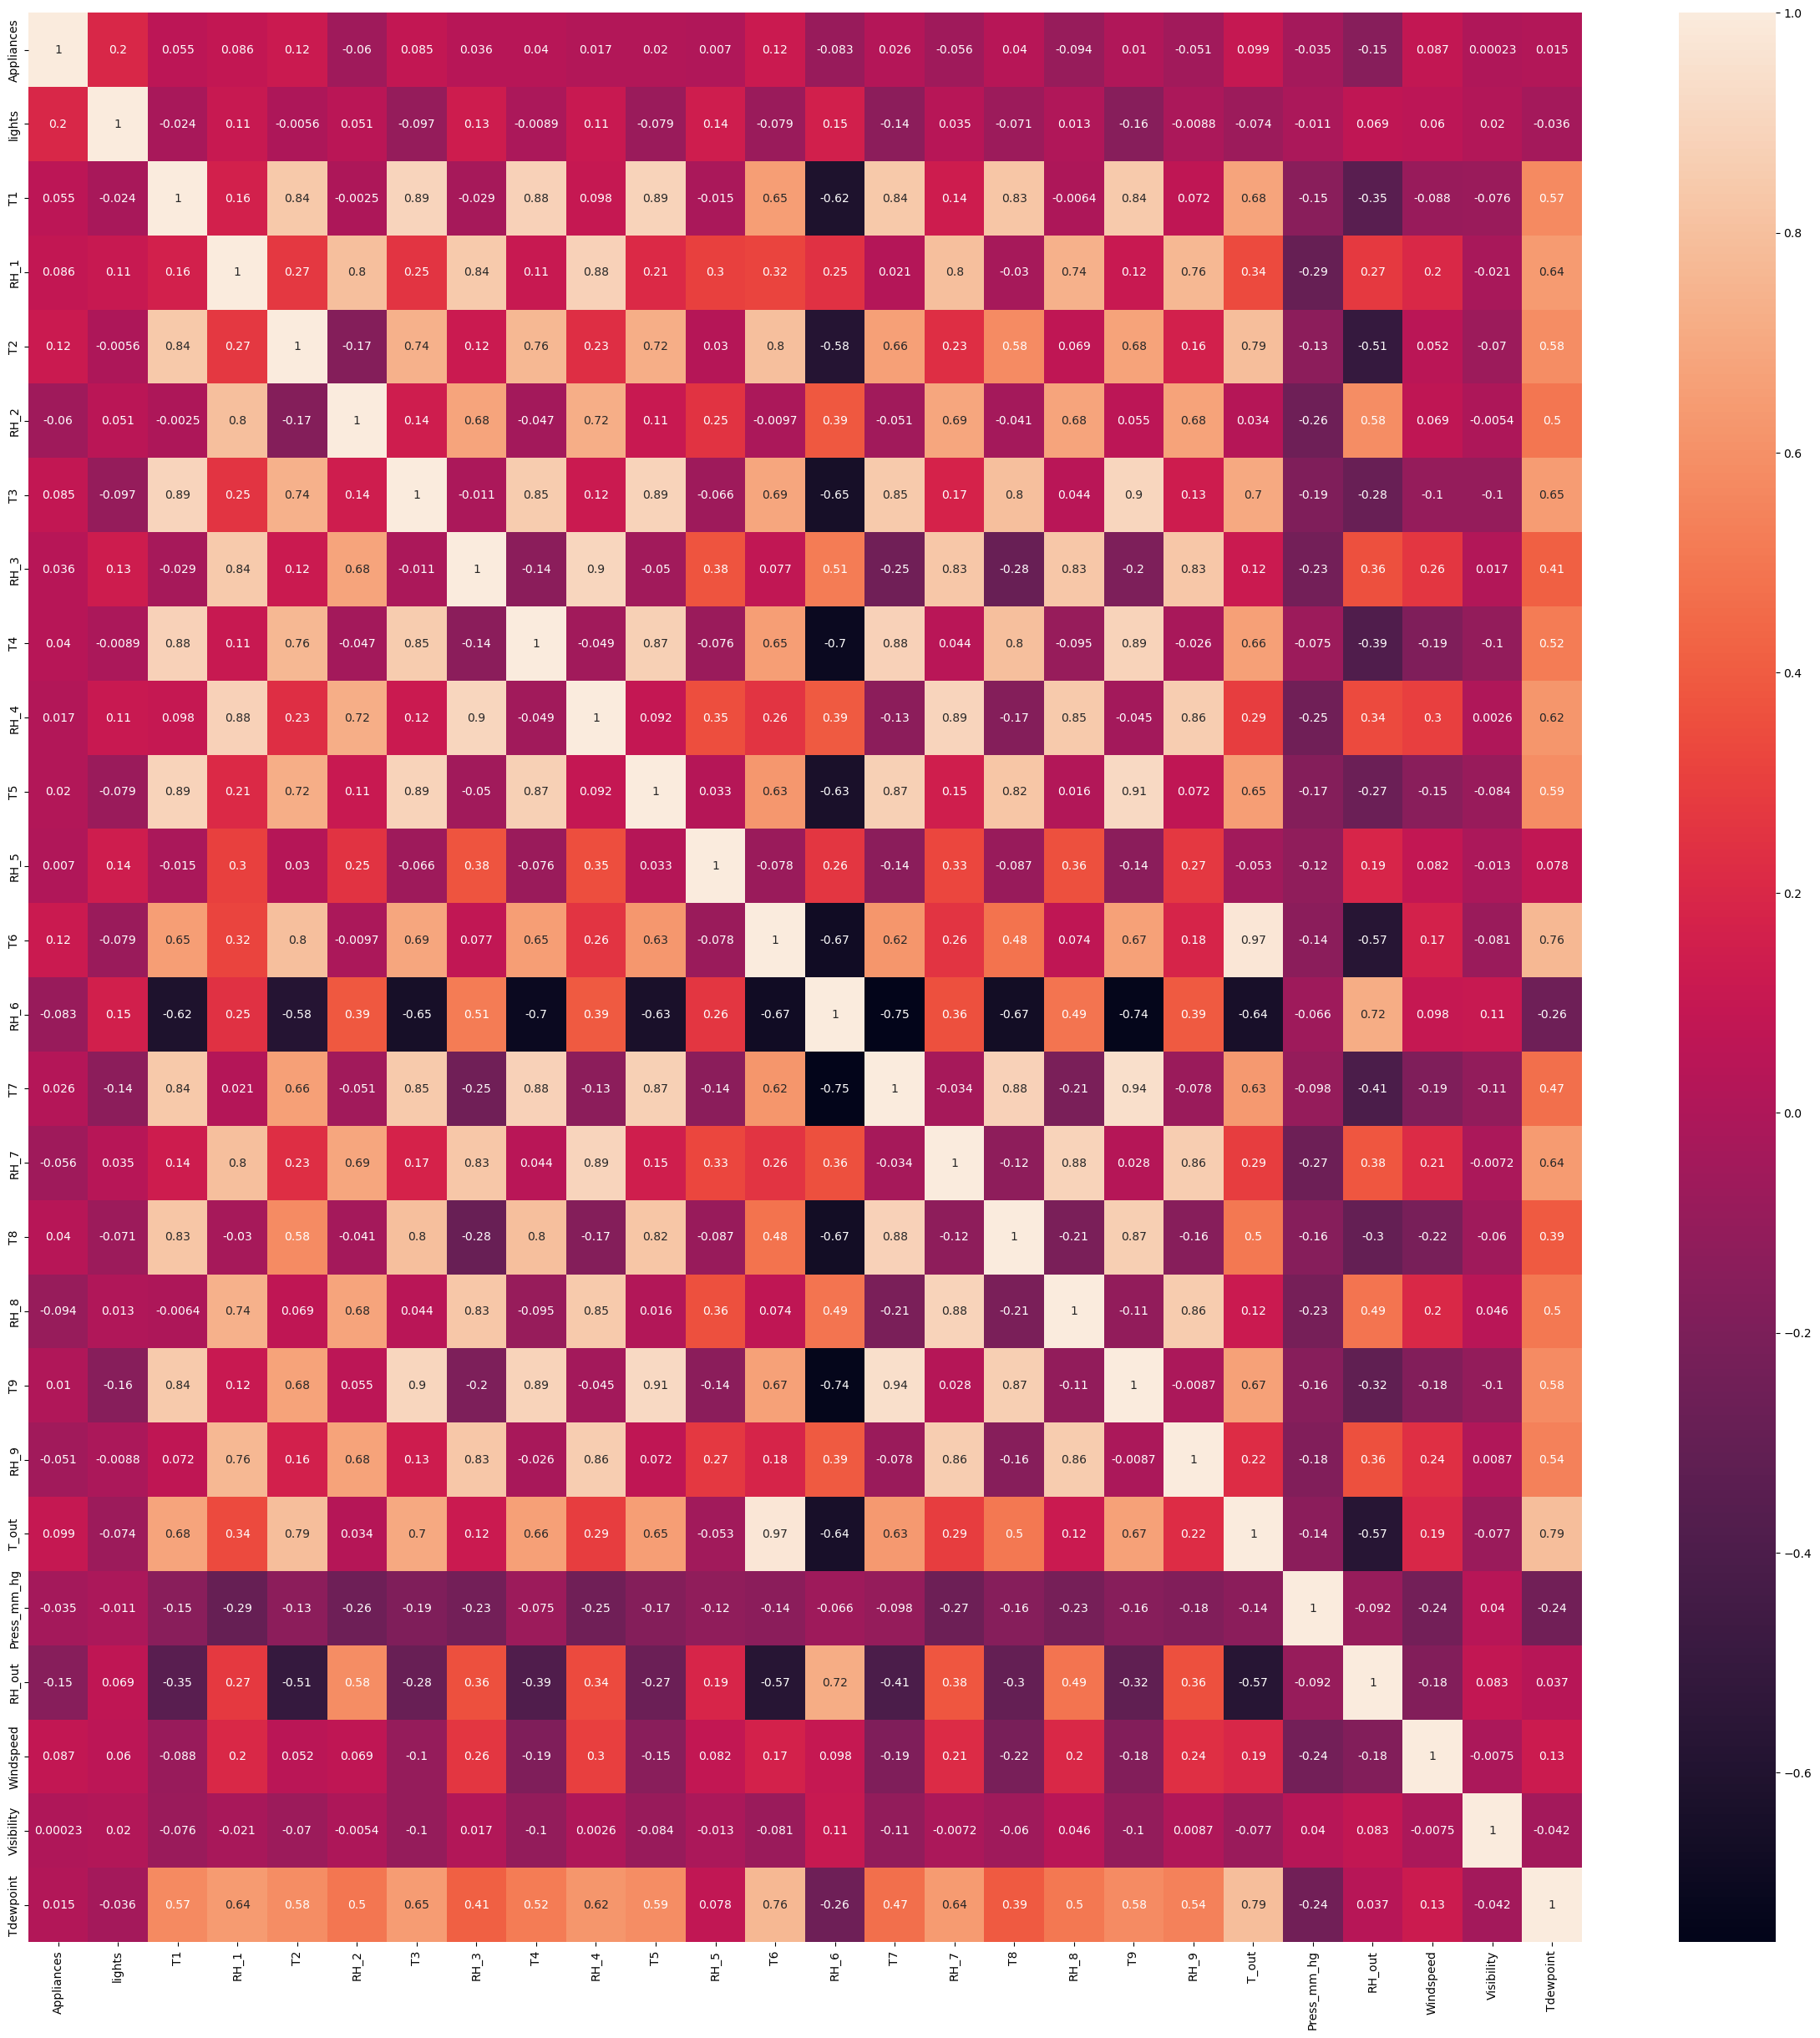

In [ ]:
corr = dataVisual.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot=True)

## Preprocessing Data

Prior to feeding the data into the model, we conducted preprocessing techniques aimed at optimizing the performance of the model. Specifically, we normalized the features in order to ensure a normal distribution. Additionally, we identified and removed outliers from the data as they can have a detrimental impact on the predictive capabilities of the model. Upon removing the outliers, we discovered that several features had missing values. To address this, we utilized an imputation method to fill in the missing values, with the mean value of each feature being used as a means of imputation.

In [ ]:
## Data Normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataTrans = pd.DataFrame(scaler.fit_transform(dataVisual), columns=dataVisual.columns)
dataTrans.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,0.046729,0.428571,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,...,0.173329,0.661412,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462
1,0.046729,0.428571,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,...,0.173329,0.660155,0.226500,0.678532,0.369132,0.100000,0.894737,0.476190,0.894872,0.533937
2,0.037383,0.428571,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,...,0.173329,0.655586,0.219563,0.676049,0.365595,0.102326,0.894737,0.452381,0.835897,0.529412
3,0.037383,0.571429,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,...,0.164175,0.650788,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887
4,0.046729,0.571429,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,...,0.164175,0.650788,0.219563,0.671909,0.357878,0.106977,0.894737,0.404762,0.717949,0.520362


In [ ]:
#eliminating outliers using interquartile range (IQR)
Q1=dataTrans.quantile(0.25)
Q3 = dataTrans.quantile(0.75)
IQR = Q3-Q1

dataClean = dataTrans[~((dataTrans < (Q1-IQR * 1.5)) |(dataTrans > (Q3 + IQR*1.5)))]
dataClean.head()
dataClean.shape

(19735, 26)

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
dataImp = pd.DataFrame(imputer.fit_transform(dataClean), columns=dataClean.columns)
dataImp.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,0.046729,0.0,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,...,0.173329,0.661412,0.223032,0.677290,0.372990,0.615662,0.894737,0.500000,0.529569,0.538462
1,0.046729,0.0,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,...,0.173329,0.660155,0.226500,0.678532,0.369132,0.615662,0.894737,0.476190,0.529569,0.533937
2,0.037383,0.0,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,...,0.173329,0.655586,0.219563,0.676049,0.365595,0.615662,0.894737,0.452381,0.835897,0.529412
3,0.037383,0.0,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,...,0.164175,0.650788,0.219563,0.671909,0.361736,0.615662,0.894737,0.428571,0.776923,0.524887
4,0.046729,0.0,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,...,0.164175,0.650788,0.219563,0.671909,0.357878,0.615662,0.894737,0.404762,0.717949,0.520362


In [ ]:
dataImp.isnull().sum()

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
dtype: int64

## Features Selection

To enhance the model's predictive accuracy and ensure that only the most relevant features are used in the training process, we conducted feature selection.
Firstly, we utilized the univariate selection method with F-value to identify the most significant features. This method involves evaluating the relationship between each feature and the target variable independently. Following this, the 10 most important features were selected for the model training.

Secondly, we employed the feature importance technique to identify the most influential features. This method involves training the model and ranking the importance of each feature based on its contribution to the model's accuracy. The 10 features with the highest importance scores were then selected for the model training.

### Univariate Selection

In [ ]:
dataTarget = dataImp['Appliances']
dataPred = dataImp.drop('Appliances', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(dataPred, dataTarget, test_size=0.2, random_state=0)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

selector = SelectKBest(score_func=f_regression, k=10)
fit = selector.fit(dataPred, dataTarget)
dfscores = pd.DataFrame(fit.scores_)
dfpred = pd.DataFrame(dataPred.columns)
featScore = pd.concat([dfpred, dfscores], axis=1)
featScore.columns = ['Feature', 'Score']
featScore.nlargest(10, 'Score')

,Feature,Score
3,T2,1478.324098
15,T8,1435.651527
21,RH_out,1195.591436
1,T1,1073.495270
12,RH_6,1037.428268
11,T6,884.603121
16,RH_8,856.944863
7,T4,782.462412
18,RH_9,734.715489
19,T_out,728.562614


### Feature Importance

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

<Axes: >

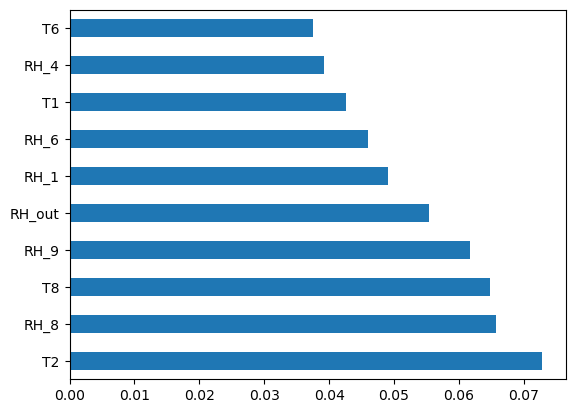

In [ ]:
model = ExtraTreesRegressor()
model.fit(x_train, y_train)
feat_importance = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importance.nlargest(10).plot(kind='barh')

## Data Splitting

To ensure that the dataset is appropriately prepared for model training, we have performed a splitting process which involves dividing the data into two distinct subsets - the training dataset and the test dataset. Each variable in the dataset has undergone this process, with 80% of the total data being allocated to the training dataset and the remaining 20% assigned to the test dataset.
Further, we have carried out a secondary splitting of the training dataset, where it has been divided into two subsets - the training dataset and the validation dataset. In this instance, 80% of the training data has been assigned to the training dataset, with the remaining 20% being designated as the validation dataset. This approach enables us to leverage the majority of the data for model training, while also allowing us to test and validate the model's performance on a separate and distinct dataset.

In [ ]:
y = dataImp['Appliances']
X = dataImp[['T2', 'T6', 'T8', 'T1', 'T_out', 'T4','RH_9', 'RH_6', 'RH_8', 'RH_out', 'lights']]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [ ]:
xTrain, xVal, yTrain, yVal = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

## Baseline Model

To establish a baseline model for our analysis, we have employed regression model which is random forest regressor. We have utilized the default parameters. On the other hand, we have varied the n_estimators parameter from 1 to 100 for the random forest regressor. In order to evaluate the performance of each model, we have utilized mean absolute error (MAE) as the primary metric.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
regmodel = LinearRegression()
regmodel = regmodel.fit(xTrain, yTrain)
predReg = regmodel.predict(xVal)
maeReg = mean_absolute_error(yVal, predReg)
print('This is MAE score for Linear Regression : ', round(maeReg, 3))

This is MAE score for Linear Regression :  0.017


In [ ]:
def modelRF(n, xTrain, yTrain, xVal, yVal):
    modelRF = RandomForestRegressor(n_estimators=n)
    modelRF.fit(xTrain, yTrain)
    predRF = modelRF.predict(xVal)
    maeRF = mean_absolute_error(yVal, predRF)
    return print('This is MAE score for Random Forest Regressor model', n, 'estimators : ', round(maeRF, 3))

In [ ]:
n = [1, 5, 10, 20, 25, 50, 75, 100]

for i in n:
    modelRF(i, xTrain, yTrain, xVal, yVal)

This is MAE score for Random Forest Regressor model 1 estimators :  0.014
This is MAE score for Random Forest Regressor model 5 estimators :  0.012
This is MAE score for Random Forest Regressor model 10 estimators :  0.011
This is MAE score for Random Forest Regressor model 20 estimators :  0.011
This is MAE score for Random Forest Regressor model 25 estimators :  0.011
This is MAE score for Random Forest Regressor model 50 estimators :  0.011
This is MAE score for Random Forest Regressor model 75 estimators :  0.011
This is MAE score for Random Forest Regressor model 100 estimators :  0.011


## Model building 

Finally I build the model with best performance that I know from baseline model. In here I decide to use random forest regressor model with parameter n_estimators are 20 and the criterion parameter is 'mae'.

In [ ]:
modelFinal = RandomForestRegressor(n_estimators=20)
modelFinal.fit(x_train, y_train)
predFinal = modelFinal.predict(x_test)
maeFinal = mean_absolute_error(y_test, predFinal)
print('This is MAE score of final model :', round(maeFinal, 3))

This is MAE score of final model : 0.011


In [2]:
#LSTM regressio
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed 
tf.random.set_seed(7)
# load the dataset
dataframe = read_csv('energydata_complete.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Epoch 1/100
13220/13220 - 24s - loss: 0.0046 - 24s/epoch - 2ms/step
Epoch 2/100
13220/13220 - 23s - loss: 0.0042 - 23s/epoch - 2ms/step
Epoch 3/100
13220/13220 - 22s - loss: 0.0042 - 22s/epoch - 2ms/step
Epoch 4/100
13220/13220 - 25s - loss: 0.0042 - 25s/epoch - 2ms/step
Epoch 5/100
13220/13220 - 22s - loss: 0.0042 - 22s/epoch - 2ms/step
Epoch 6/100
13220/13220 - 22s - loss: 0.0042 - 22s/epoch - 2ms/step
Epoch 7/100
13220/13220 - 22s - loss: 0.0042 - 22s/epoch - 2ms/step
Epoch 8/100
13220/13220 - 21s - loss: 0.0042 - 21s/epoch - 2ms/step
Epoch 9/100
13220/13220 - 23s - loss: 0.0042 - 23s/epoch - 2ms/step
Epoch 10/100
13220/13220 - 22s - loss: 0.0042 - 22s/epoch - 2ms/step
Epoch 11/100
13220/13220 - 22s - loss: 0.0042 - 22s/epoch - 2ms/step
Epoch 12/100
13220/13220 - 21s - loss: 0.0042 - 21s/epoch - 2ms/step
Epoch 13/100
13220/13220 - 23s - loss: 0.0042 - 23s/epoch - 2ms/step
Epoch 14/100
13220/13220 - 22s - loss: 0.0042 - 22s/epoch - 2ms/step
Epoch 15/100
13220/13220 - 22s - loss: 0.00